In [244]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# 导入附加的可视化代码visuals.py
import visuals as vs
import warnings

from matplotlib import pyplot  as plt
import seaborn as sns
%matplotlib inline

In [220]:
# 导入数据
data = pd.read_csv("census.csv")

In [221]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [222]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [223]:
data.income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [224]:
#划分feature和label
label_raw = data['income']
features_raw = data.drop('income', axis = 1)

capital-gain和capital-loss的分布情况

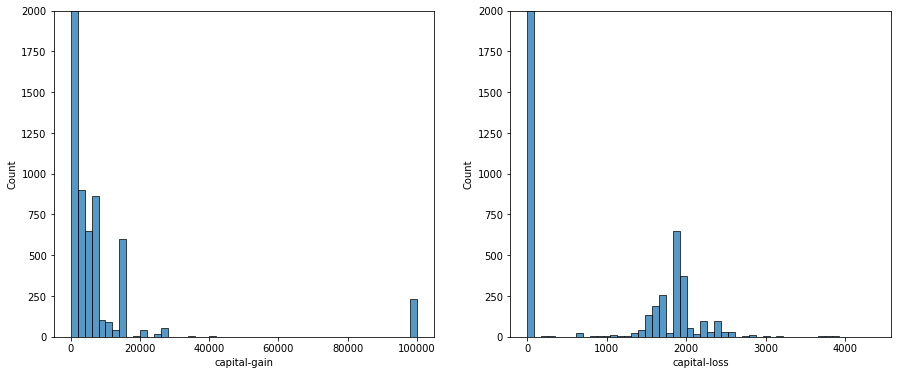

In [225]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,6))
sns.histplot(features_raw['capital-gain'],bins = 50,ax = ax1)
ax1.set_ylim([0,2000])

sns.histplot(features_raw['capital-loss'],bins = 50,ax = ax2)
ax2.set_ylim([0,2000]);

可以看到数据分布非常不均匀，存在某些极大的偏移值，这会使模型对这些值非常敏感，我们对数据做对数转换

In [226]:
for i in ['capital-gain','capital-loss']:
    features_raw[i] = features_raw[i].apply(np.log1p)

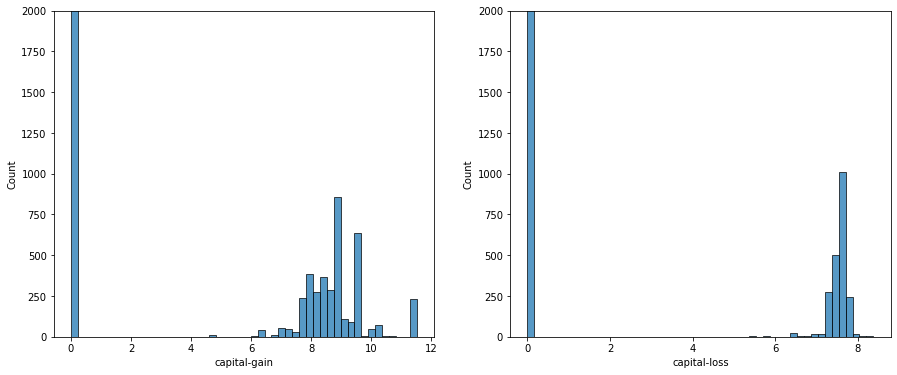

In [227]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,6))
sns.histplot(features_raw['capital-gain'],bins = 50,ax = ax1)
ax1.set_ylim([0,2000])

sns.histplot(features_raw['capital-loss'],bins = 50,ax = ax2)
ax2.set_ylim([0,2000]);

In [228]:
#对数值数据进行归一化
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

In [229]:
# 显示一个经过缩放的样例记录
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


In [230]:
#进行独热编码
features = pd.get_dummies(features_raw)

In [231]:
#z转换label_raw为数字类型
label = (label_raw == '>50K').astype(int)

In [232]:
features.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=103)

In [233]:
# 将'features'和'label'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 0,
                                                    stratify = label)
# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                    stratify = y_train)

# 显示切分的结果
print ("训练集有 {}个样本.".format(X_train.shape[0]))
print ("验证集有 {}个样本".format(X_val.shape[0]))
print ("测试集有 {}个样本".format(X_test.shape[0]))

训练集有 28941个样本.
验证集有 7236个样本
测试集有 9045个样本


计算天真的预测器的性能

In [234]:
#假设天真的预测器将所有人都预测为正例，此时召回率为1，计算准确率和F0.5score
accuracy = label.sum()/len(label)
fscore = (1+0.5**2)*accuracy/(1+0.5**2*accuracy)

In [235]:
print('准确率为{:.4f},F0.5score为{:.4f}'.format(accuracy,fscore))

准确率为0.2478,F0.5score为0.2917


### 随机森林

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, accuracy_score

In [153]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [501]:
clf_A = RandomForestClassifier(random_state=0,n_estimators=200,max_depth=15)

clf_A.fit(X_train,y_train)

predict_val_A = clf_A.predict(X_val)

print('准确率','%.2f'%(accuracy_score(y_val,predict_val_A)*100))
print('F0.5score','%.2f'%(fbeta_score(y_val,predict_val_A,beta=0.5)*100))

准确率 86.42
F0.5score 75.09


In [502]:
clf_A

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### 逻辑回归

In [100]:
from sklearn.linear_model import LogisticRegression

In [531]:
clf_B = LogisticRegression(C = 1.1,random_state=0,solver = 'sag',max_iter = 500)

clf_B.fit(X_train,y_train)

predict_val_B = clf_B.predict(X_val)

print('准确率','%.2f'%(accuracy_score(y_val,predict_val_B)*100))
print('F0.5score','%.2f'%(fbeta_score(y_val,predict_val_B,beta=0.5)*100))

准确率 85.38
F0.5score 71.84


In [476]:
clf_B

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### svm

In [460]:
from sklearn.svm import SVC

In [545]:
clf_Cc = SVC(C = 1,max_iter=1000)
clf_Cc.fit(X_train,y_train)
predict_val_C = slf_C.predict(X_val)
print('准确率','%.2f'%(accuracy_score(y_val,predict_val_C)*100))
print('F0.5score','%.2f'%(fbeta_score(y_val,predict_val_C,beta=0.5)*100))

准确率 84.19
F0.5score 68.37


In [539]:
clf_Cc

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=1000, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### 决策树

In [236]:
from sklearn.tree import DecisionTreeClassifier

In [471]:
clf_D = DecisionTreeClassifier(random_state = 21,max_depth=14,min_samples_leaf=16,min_samples_split = 2)

clf_D.fit(X_train,y_train)

predict_val_D = clf_D.predict(X_val)

print('准确率','%.2f'%(accuracy_score(y_val,predict_val_D)*100))
print('F0.5score','%.2f'%(fbeta_score(y_val,predict_val_D,beta=0.5)*100))

准确率 86.19
F0.5score 74.26


In [470]:
clf_D

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=21, splitter='best')

### adaboost

In [276]:
from sklearn.ensemble import AdaBoostClassifier

In [561]:
clf_E = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),random_state=0,n_estimators=200
                           ,learning_rate=0.7)

clf_E.fit(X_train,y_train)

predict_val_E = clf_E.predict(X_val)

print('准确率','%.2f'%(accuracy_score(y_val,predict_val_E)*100))
print('F0.5score','%.2f'%(fbeta_score(y_val,predict_val_E,beta=0.5)*100))

准确率 87.55
F0.5score 76.45


In [562]:
clf_E

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

### 在测试集上测试模型

In [563]:
test_predict = clf_E.predict(X_test)

In [565]:
print('准确率','%.2f'%(accuracy_score(y_test,test_predict)*100))
print('F0.5score','%.2f'%(fbeta_score(y_test,test_predict,beta=0.5)*100))

准确率 87.48
F0.5score 76.49
